In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
from osgeo import gdal
from lib import temp_lib
from scipy import fftpack
import numpy.linalg as npl
Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'
Tifpath1 = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3N0-iHV_t1_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'
gdal.UseExceptions()

ds_normal = gdal.Open(Tifpath1)
ds = gdal.Open(Tifpath)
ds_normal1 = np.array(ds_normal.GetRasterBand(1).ReadAsArray())
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())


ds_normal11 = ds_normal1[10:-10, 20:-50]
ds_norm1 = ds_band1[10: -10, 20:-50]/ds_normal11
ds_norm3 = ds_band3[10: -10, 20:-50]/ds_normal11
from how2spectro_Morlet2 import morlet2
from how2spectro_Morlet2 import cwt

/home/wilhelm/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


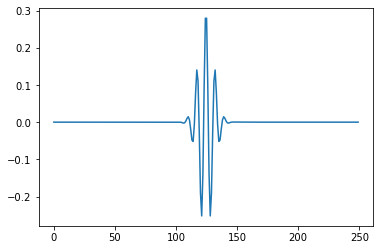

In [18]:
plt.plot(morlet2(250,6))

In [2]:
im = temp_lib(ds_band1)
print(np.var(im._ds_band))

0.0067037446


In [3]:
im1 = temp_lib(ds_norm1)
print(np.var(im1._ds_band))
im3 = temp_lib(ds_norm3)

0.0014730471


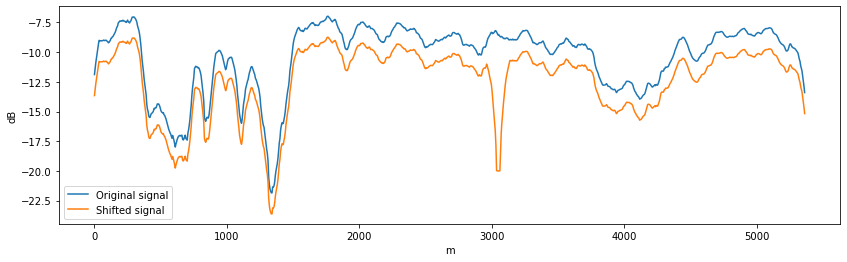

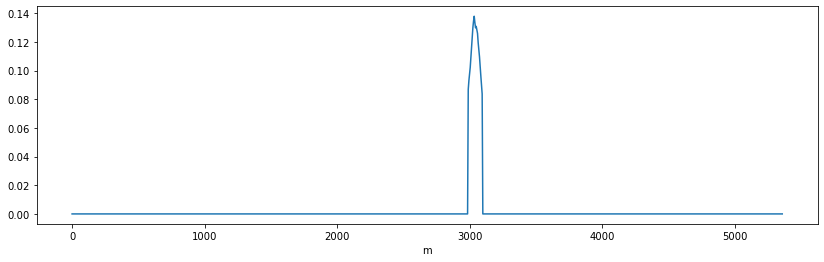

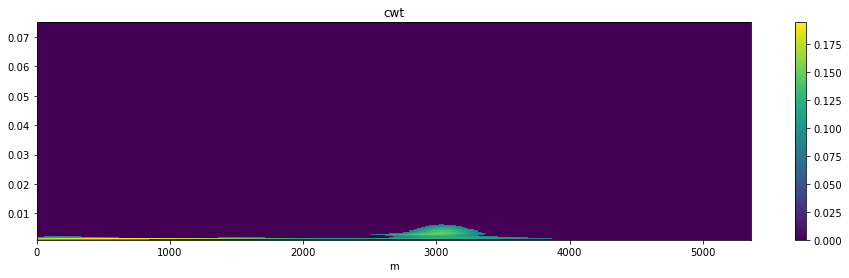

In [4]:
im1.extract_band()
im1._multiplier = 1

im1.extract_band([500,520])
sig = np.var(im1._ds_band)
im3.extract_band()
im3._multiplier = 1
#im1.extract_band([500,520])
taille_pixel = im1._s # 5
n_pixel = 20
x = 3000 # 5400, 5600
location = [x, int(taille_pixel * n_pixel + x)]
shift = 500
w = 6
shifted3 = im3.simulate_shift(shift)
deforst = im1.simulate_deforestation_v2(location, mu = 0.01, sigma = sig / 5)
deforst = im1.decrease_resolution_v2(deforst,n = 15)
im1.decrease_resolution(15)
shifted1 = im1.simulate_shift(shift)
im1._ds_band = shifted1
im1.plot_sections(deforst)
diff = np.abs((im1._ds_band - deforst))
#im1.plot_diff(diff)
cwt_diff = im1.cwt_v2(diff, w)
#im1.plot_cwt(cwt_diff)
cwt1 = im1.cwt_v2(im1._ds_band, w)
cwt2 = im1.cwt_v2(deforst, w)
tmp = np.abs(cwt1-cwt2)
#im1.plot_cwt(cwt1*np.conj(cwt2))
seuil = 0.08
diff[diff<seuil] = 0
im1.plot_diff(diff)
#tmp = np.abs(cwt_diff)
tmp[tmp<seuil] = 0
im1.plot_cwt(tmp)

/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:87: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(self._ds_band)*10, label = "Period 1")
/home/wilhelm/INSA/4A/S2/CESBIO/lib.py:89: RuntimeWarning: divide by zero encountered in log10
  plt.plot(self._x, np.log10(other._ds_band)*10, label = "Period 3")


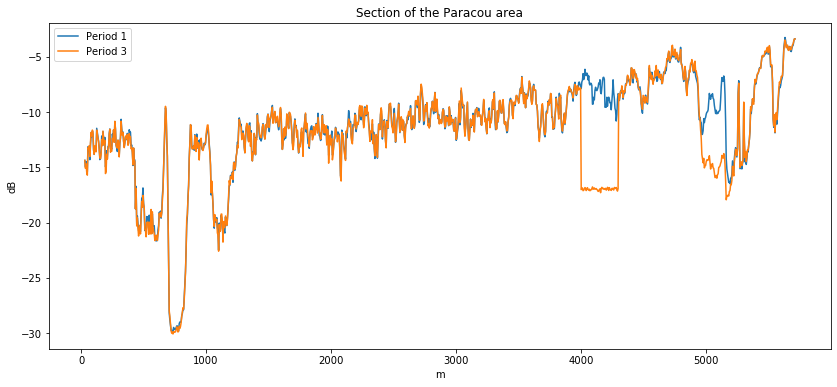

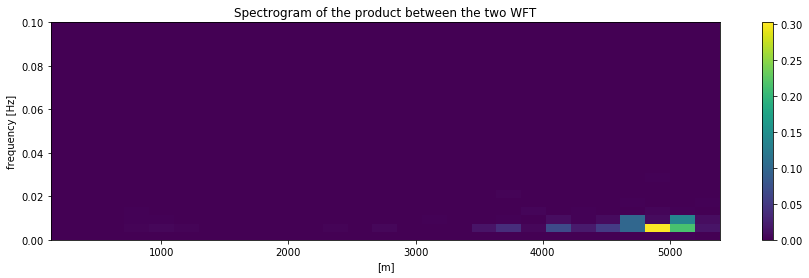

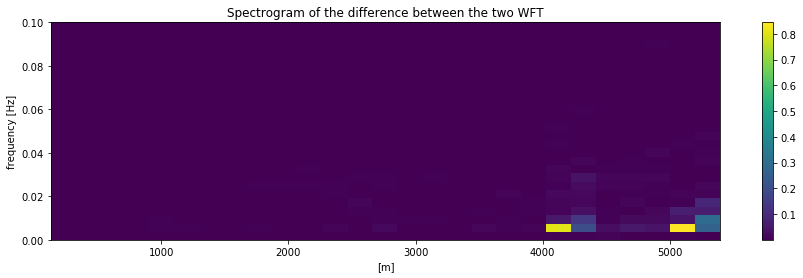

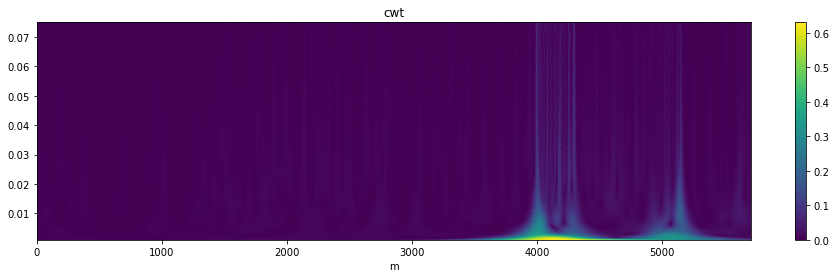

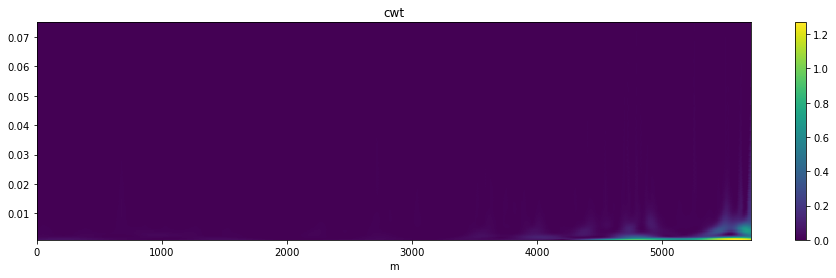

In [6]:
im1 = temp_lib(ds_band1)
im3 = temp_lib(ds_band3)

#im1.decrease_resolution(n = 30)
#im3.decrease_resolution(n = 30)

#im1._ds_band = im1.simulate_shift(s = 20)
im3._ds_band = im3.simulate_deforestation_v2([4000,4300], mu = 0.02, sigma = np.var(im1._ds_band)/15)

im1.spectrogram(n_win = 52, plot = False)
im3.spectrogram(n_win = 52, plot = False)
im1.plot_section(im3)
im1.cross_spectro(im3, prod = True)

im1.cross_spectro(im3, diff = True)


w = 2.5
cwt1 = im1.cwt_v2(im1._ds_band, w)
cwt2 = im3.cwt_v2(im3._ds_band, w)
dcwt = np.abs(cwt1-cwt2)
pcwt = np.abs(cwt1*np.conj(cwt2))
im1.plot_cwt(dcwt)
im1.plot_cwt(pcwt)

dz = np.abs(im1._spectro_Z - im3._spectro_Z)
seuil = 0.4